# Logistic Regression (로지스틱 회귀분석) 분류 기법

## 1. 로지스틱 회귀분석의 이해

### 1) 사전 지식
- logistic function (= sigmoid function)

- 0과 1로 수렴하는 특징을 갖는다

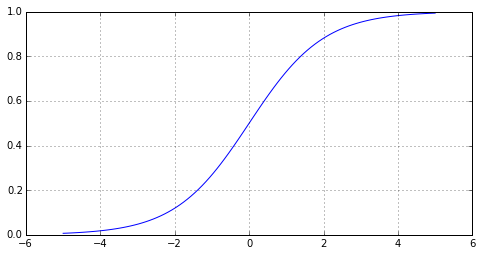

In [4]:
import math 
from scipy import stats
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
%matplotlib inline

def logistic(z):   #로지스틱 리니어 리그레션을 만드는 함수
    return 1.0 / (1.0 + np.power(math.e, -1.0 * z))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(111)
ax1.grid(True)
xx = np.linspace(-5, 5, 100)
ax1.plot(xx,  logistic(xx))

### 2) 로지스틱 회귀분석을 이해하기 위한 예제 제시

- 예제 (Age and coronary heart disease (CHD))
<img src="https://github.com/bluebibi/LINK_ML_BIG_DATA/raw/3730604a47b80e2c24c72ed851187062e390e169/figures/chd.png" />

In [5]:
age = np.array([22, 23, 24, 27, 28, 30, 30, 32, 33, 35, 38, 40, 41, 46, 47, 48, 49,\
                49, 50, 51, 51, 52, 54, 55, 58, 60, 60, 62, 65, 67, 71, 77, 81])
chd = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])
df = pd.DataFrame({'age': age, 'chd': chd})
df

,age,chd
0,22,0
1,23,0
2,24,0
3,27,0
4,28,0
5,30,0
6,30,0
7,32,0
8,33,0
9,35,1


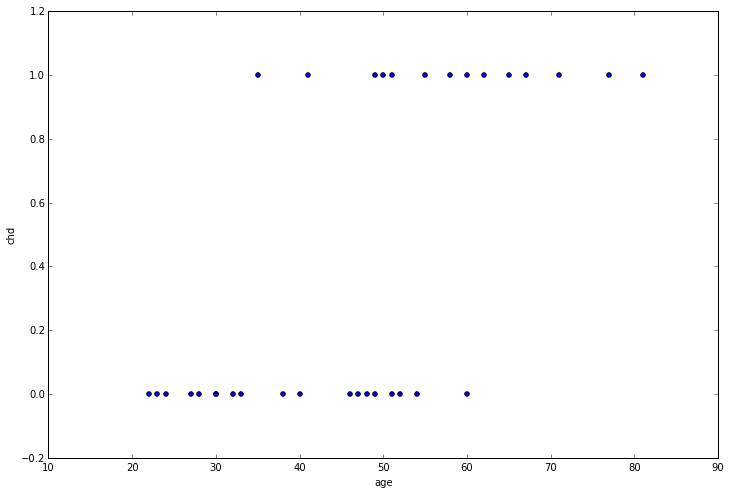

In [6]:
df.plot(kind='scatter', x='age', y='chd', figsize=(12, 8));   #0과 1로 분류하는 작업

- 위 그림에서
    - chd = 1은 심장병이 있다는 것이고 앞으로 y = 1 (양성 반응) 이라고 표기한다.
    - chd = 0은 심장병이 없다는 것이고 앞으로 y = 0 (음성 반응) 이라고 표기한다.

- 로지스틱 회귀 분석을 이해하기 위하여, 우선 위 데이터에 대하여 단순하게 회귀 분석 (Linear Regression)을 수행하여 산출한 h 함수 (hyperthesis)를 plotting

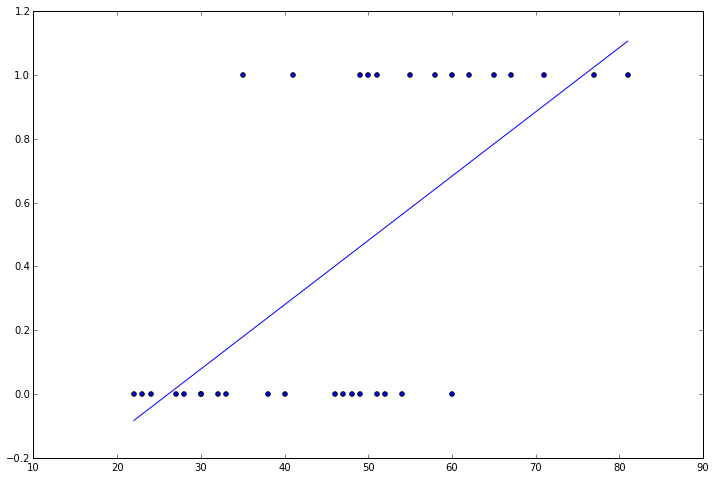

In [7]:
slope, intercept, r_value, p_value, std_err = stats.linregress(age, chd)
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
ax1.scatter(age, chd)
xx = np.linspace(age.min(), age.max(), 2)
ax1.plot(xx, intercept + slope * xx)

## 2. Univariate Logistic Regression (단일 변수 로지스틱 회귀분석)

### -  sklearn 모듈 활용

In [9]:
from sklearn import linear_model
regr = linear_model.LogisticRegression()

age_ = []                #age_ 는 리스트 이며, 원소 한개 짜리 튜플
for i in age:
    age_.append((i,))
    
print age_
regr = regr.fit(age_, chd)  #fit을 수행

print 'Coefficients:', regr.coef_
print 'Intercept:', regr.intercept_

[(22,), (23,), (24,), (27,), (28,), (30,), (30,), (32,), (33,), (35,), (38,), (40,), (41,), (46,), (47,), (48,), (49,), (49,), (50,), (51,), (51,), (52,), (54,), (55,), (58,), (60,), (60,), (62,), (65,), (67,), (71,), (77,), (81,)]
Coefficients: [[ 0.03851967]]
Intercept: [-1.89317939]


In [10]:
def h_theta(x):   #linear regression 모델을 만드는 함수 / h값을 반환
    return regr.intercept_[0] + regr.coef_[0][0] * x

### - Logistic Linear Regression 모델을 생성

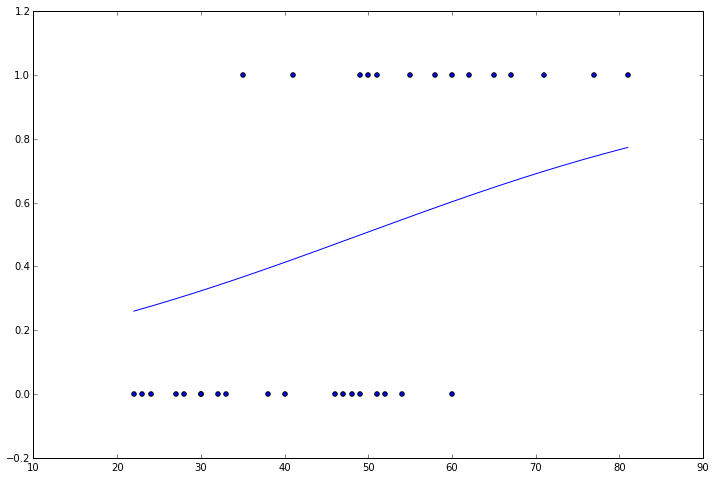

In [11]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(111)
ax1.scatter(age, chd)
xx = np.linspace(age.min(), age.max(), 1000)
ax1.plot(xx, logistic(h_theta(xx)))   #logistic은 로지스틱 리니어 리그레션 을 만드는 함수

- 49.14세 이상은 심장병이 있다. 없다 를 구분하는 기준이 되는데 다음과 같이 계산

In [12]:
print -1.0 * regr.intercept_[0] / regr.coef_[0][0]

49.1483851852


- 직접 고려하여 확률이 0.5가 되는 부분을 for문을 통하여 찾기

In [13]:
xx = np.linspace(age.min(), age.max(), 1000)
for x in xx:
    if abs(logistic(h_theta(x)) - 0.5000) < 0.0003:
        print x

49.1671671672


- 즉, 나이가 49.1 세부터는 심장병이 존재할 확률이 0.5 이상이며 "심장병 존재 가능자"로 분류할 수 있다.

- 나이가 50세, 60세, 70세, 80세일 때 심장병이 존재할 확률은?

In [14]:
print logistic(h_theta(50))
print logistic(h_theta(60))
print logistic(h_theta(70))
print logistic(h_theta(80))

0.508200244269
0.603004707604
0.690657986785
0.766453692561


### - 로지스틱 분석 이해를 위한 데이터 변형

In [17]:
age = np.array([22, 23, 24, 27, 28, 30, 30, 32, 33, 35, 38, 40, 41, 46, 47, 48, 49,\
                49, 50, 51, 51, 52, 54, 55, 58, 60, 60, 62, 65, 67, 71, 77, 81])
chd2 = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
df2 = pd.DataFrame({'age': age, 'chd': chd2})
regr2 = linear_model.LogisticRegression()

age_ = []
for i in age:
    age_.append((i,))
regr2 = regr2.fit(age_, chd2)

print 'Coefficients:', regr2.coef_
print 'Intercept:', regr2.intercept_

Coefficients: [[ 0.07131931]]
Intercept: [-2.25741509]


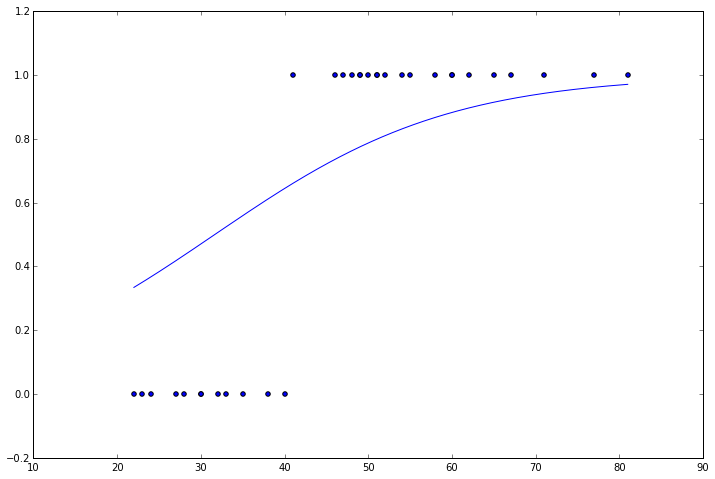

In [18]:
def h_theta(x):
    return regr2.intercept_[0] + regr2.coef_[0][0] * x

fig2 = plt.figure(figsize=(12, 8))
ax2 = fig2.add_subplot(111)
ax2.scatter(age, chd2)
xx2 = np.linspace(age.min(), age.max(), 1000)
ax2.plot(xx2, logistic(h_theta(xx2)))

- 확률이 0.5가 되는 지점의 나이 찾기

In [19]:
print -1.0 * regr2.intercept_[0] / regr2.coef_[0][0]
xx2 = np.linspace(age.min(), age.max(), 1000)
for x in xx2:
    if abs(logistic(h_theta(x)) - 0.5000) < 0.0005:
        print x

31.6522293282
31.6266266266


In [20]:
print logistic(h_theta(50))
print logistic(h_theta(60))
print logistic(h_theta(70))
print logistic(h_theta(80))

0.787270468923
0.883061158965
0.939056959384
0.969175310841


## 3. Multivariate Logistic Regression (다변수 로지스틱 회귀분석)
### 1) Mushroom Data Set 로드 및 scikit을 활용하기 위한 데이터 가공
- Data Set 로드
    - 21개의 Features (예측 변수)
    - 2개의 분류 (타겟 변수, outcomes)

In [23]:
import urllib2
path = 'http://ftp.ics.uci.edu/pub/machine-learning-databases/mushroom/agaricus-lepiota.data'
raw_csv = urllib2.urlopen(path)
col_names = range(23)
df = pd.read_csv(raw_csv, names = col_names)

- 수치형 데이터로 변형

In [24]:
map_dic = {}
num_columns = df.shape[1]
for i in range(num_columns):
    unique_array = df[i].unique()
    map_dic_sub = {}
    for j in range(len(unique_array)):
        map_dic_sub[unique_array[j]] = j
    df[i] = df[i].map(map_dic_sub)
df

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1
5,1,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,0,1,1
6,1,1,0,2,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,1,2
7,1,1,1,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,0,2
8,0,0,1,2,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,3,1
9,1,1,0,1,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,2


In [26]:
attributes = df.iloc[:, 1:22]
mushroom_data = attributes.values
mushroom_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       [1, 0, 2, ..., 0, 1, 1],
       ..., 
       [3, 0, 0, ..., 0, 8, 5],
       [4, 1, 0, ..., 1, 4, 3],
       [0, 0, 0, ..., 0, 6, 5]])

In [28]:
target_series = df.iloc[:, 0]
mushroom_target = target_series.values
mushroom_target

array([0, 1, 1, ..., 1, 0, 1])

### 2) scikit을 활용한 로지스틱 회귀분석

In [29]:
regr3 = linear_model.LogisticRegression()
regr3.fit(mushroom_data, mushroom_target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [31]:
print 'Coefficients:', regr3.coef_   #22개의 속성에 대한 계수가 모두 출력
print 'Intercept:', regr3.intercept_

Coefficients: [[  5.87843016e-02   1.13575037e+00  -9.91573459e-03   9.17309013e+00
   -3.33157491e+00   3.62560753e-01   3.65032939e+00   1.05269840e+01
   -3.43440879e-01   2.00068508e+00   2.11067677e+00  -2.32688199e+00
   -2.49868417e+00  -6.97812077e-01   7.75703628e-01   0.00000000e+00
    4.89226940e-01   3.12869161e+00   2.29791604e-01  -1.56743618e+00
    7.31096068e-01]]
Intercept: [-2.36715778]


In [32]:
print mushroom_data[-1], ":", mushroom_target[-1]
print regr3.predict(mushroom_data[-1])

[ 0  0  0  1  3  1  0  1 10  0  4  0  0  6  7  0  2  0  0  6  5] : 1
[1]


In [33]:
predicted = []
for i in range(0, len(mushroom_data)):
    predicted.append(regr3.predict(mushroom_data[i]))

df.loc[:, 'predicted'] = predicted
df

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,predicted
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,1,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,1,1,2,1
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,1,1,2,1,1
5,1,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,1,1
6,1,1,0,2,0,1,0,0,1,2,...,0,0,0,0,0,0,0,1,2,1
7,1,1,1,2,0,2,0,0,1,1,...,0,0,0,0,0,0,1,0,2,1
8,0,0,1,2,0,0,0,0,0,3,...,0,0,0,0,0,0,0,3,1,0
9,1,1,0,1,0,1,0,0,1,2,...,0,0,0,0,0,0,0,0,2,1


- 로지스틱 회귀 분석의 정확도

In [34]:
correctly_predicted = 0
for i in range(0, len(mushroom_data)):
    if predicted[i] == mushroom_target[i]:
        correctly_predicted += 1
        
print float(correctly_predicted) / len(mushroom_data)

0.985352043328


### 2) Iris Data Set 로드 및 scikit 활용 (Multiclass Classification)
- iris 데이터는 3개의 target이 존재하기 때문에 다음과 같이 총 3번의 회귀 분석이 필요
    - setosa와 아닌 것에 대한 로지스틱 회귀 분석
    - versicolor와 아닌 것에 대한 로지스틱 회귀 분석
    - virginica와 아닌 것에 대한 로지스틱 회귀 분석

In [36]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [37]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [38]:
iris.data

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2],
       [ 5.4,  3.9,  1.7,  0.4],
       [ 4.6,  3.4,  1.4,  0.3],
       [ 5. ,  3.4,  1.5,  0.2],
       [ 4.4,  2.9,  1.4,  0.2],
       [ 4.9,  3.1,  1.5,  0.1],
       [ 5.4,  3.7,  1.5,  0.2],
       [ 4.8,  3.4,  1.6,  0.2],
       [ 4.8,  3. ,  1.4,  0.1],
       [ 4.3,  3. ,  1.1,  0.1],
       [ 5.8,  4. ,  1.2,  0.2],
       [ 5.7,  4.4,  1.5,  0.4],
       [ 5.4,  3.9,  1.3,  0.4],
       [ 5.1,  3.5,  1.4,  0.3],
       [ 5.7,  3.8,  1.7,  0.3],
       [ 5.1,  3.8,  1.5,  0.3],
       [ 5.4,  3.4,  1.7,  0.2],
       [ 5.1,  3.7,  1.5,  0.4],
       [ 4.6,  3.6,  1. ,  0.2],
       [ 5.1,  3.3,  1.7,  0.5],
       [ 4.8,  3.4,  1.9,  0.2],
       [ 5. ,  3. ,  1.6,  0.2],
       [ 5. ,  3.4,  1.6,  0.4],
       [ 5.2,  3.5,  1.5,  0.2],
       [ 5.2,  3.4,  1.4,  0.2],
       [ 4.7,  3.2,  1.6,  0.2],
       [ 4

In [39]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='|S10')

- iris 데이터를 로지스틱 회귀 분석

In [41]:
regr5 = linear_model.LogisticRegression()
regr5.fit(iris.data[:, :2], iris.target)   #속성 2개만으로 분석

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [42]:
print 'Coefficients:', regr5.coef_
print 'Intercept:', regr5.intercept_

Coefficients: [[-2.49579289  4.01011301]
 [ 0.49709451 -1.63380222]
 [ 1.15921404 -1.77736568]]
Intercept: [ 0.81713932  1.22543562 -2.22516119]


- 속성 2개에 대해서만 분석을 통해서 그래프로 그려 본 경우

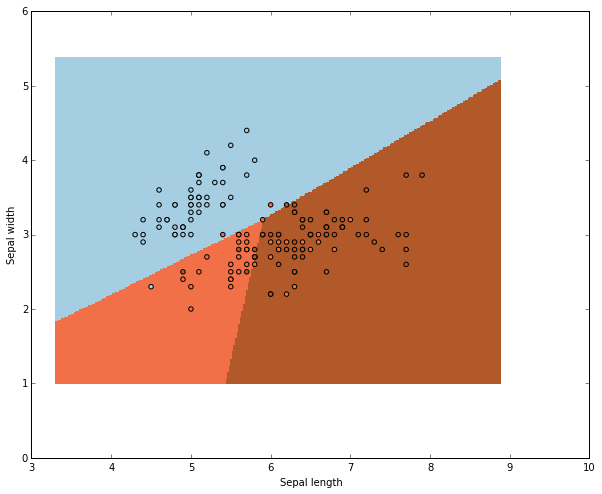

In [43]:
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

regr6 = linear_model.LogisticRegression()

# we create an instance of Neighbours Classifier and fit the data.
regr6.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x_array = np.arange(x_min - .5, x_max + .5, h)
y_array = np.arange(y_min - .5, y_max + .5, h)
xx, yy = np.meshgrid(x_array, y_array)
Z = regr6.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
ax.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [44]:
regr5.predict([9, 1])

array([2])